In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_sal = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df_sal.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
df_sal.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [5]:
df_sal.shape

(397, 6)

In [6]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [7]:
df_sal.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [8]:
#EDA

import seaborn as sns
import matplotlib.pyplot as plt

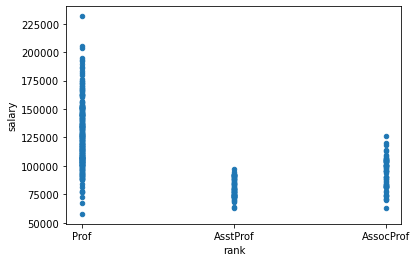

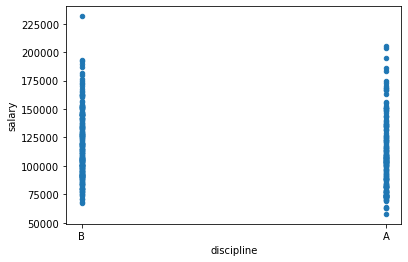

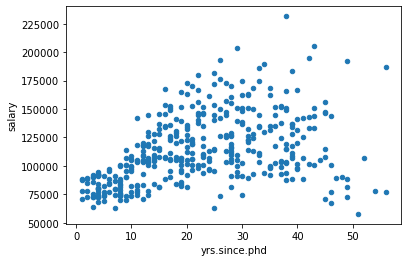

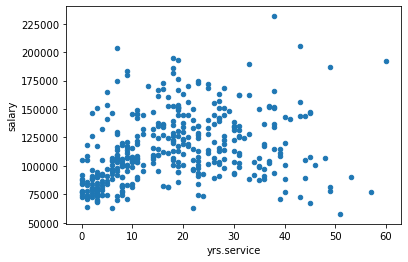

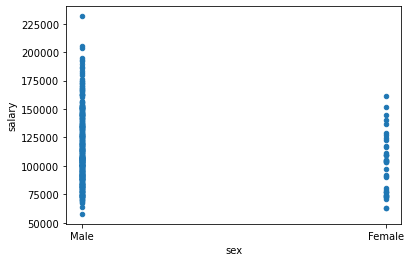

In [9]:
df_sal.plot(kind='scatter', x='rank', y='salary')
df_sal.plot(kind='scatter', x='discipline', y='salary')
df_sal.plot(kind='scatter', x='yrs.since.phd', y='salary')
df_sal.plot(kind='scatter', x='yrs.service', y='salary')
df_sal.plot(kind='scatter', x='sex', y='salary')
plt.show()

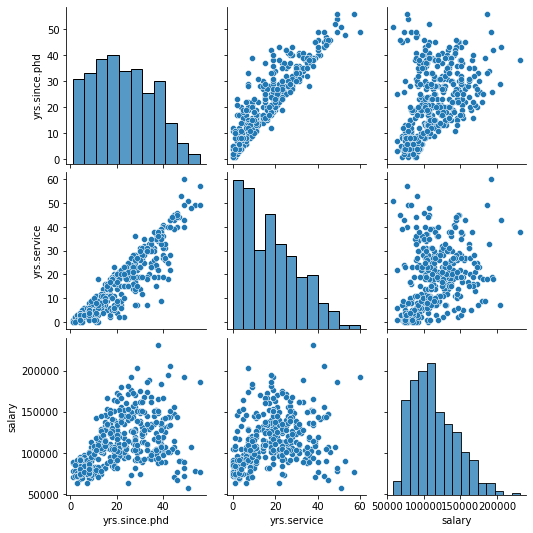

In [11]:
sns.pairplot(df_sal)
plt.savefig('pairplot.png')
plt.show()

In [12]:
print(df_sal['rank'].value_counts(),'\n')
print(df_sal['sex'].value_counts(),'\n')
print(df_sal['discipline'].value_counts(),'\n')

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64 

Male      358
Female     39
Name: sex, dtype: int64 

B    216
A    181
Name: discipline, dtype: int64 



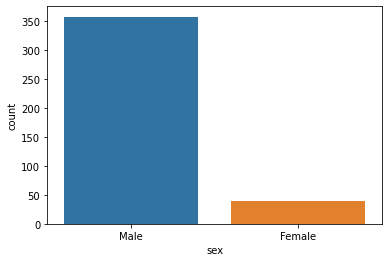

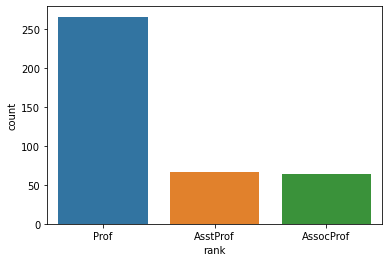

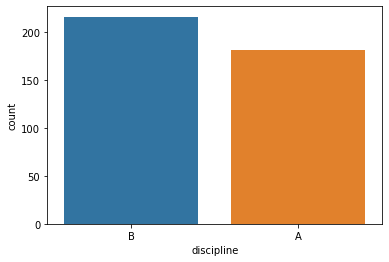

In [13]:
sns.countplot(df_sal['sex'])
plt.show()

sns.countplot(df_sal['rank'])
plt.show()

sns.countplot(df_sal['discipline'])
plt.show()

In [14]:
df_sal.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:>

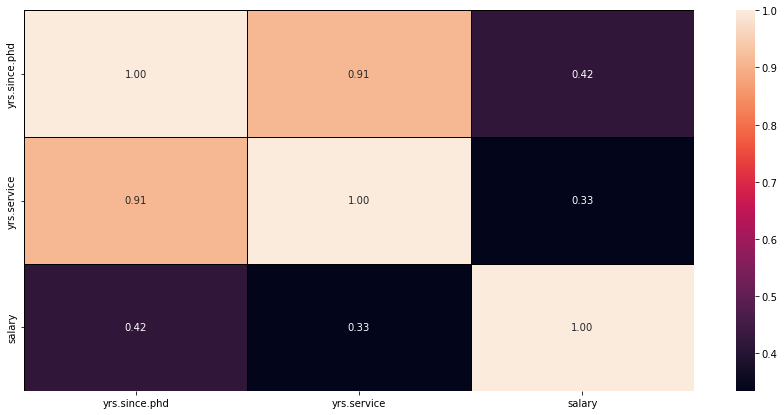

In [15]:
plt.figure(figsize=(15,7))
sns.heatmap(df_sal.corr(), annot=True, linewidths=0.5, linecolor='Black', fmt = '.2f')

In [16]:
df_sal.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [17]:
#Skewness:

df_sal.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

<AxesSubplot:xlabel='salary'>

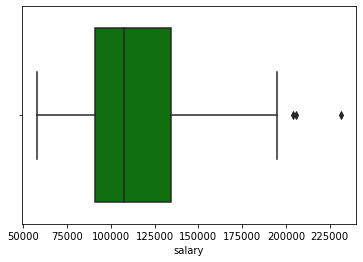

In [18]:
sns.boxplot(df_sal['salary'],color='green',orient='v')

<AxesSubplot:xlabel='yrs.service'>

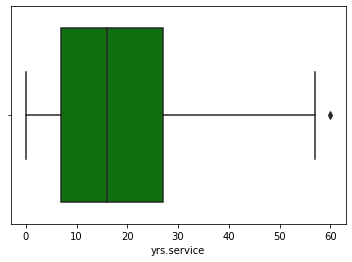

In [19]:
sns.boxplot(df_sal['yrs.service'],color='green',orient='v')

<AxesSubplot:xlabel='yrs.since.phd'>

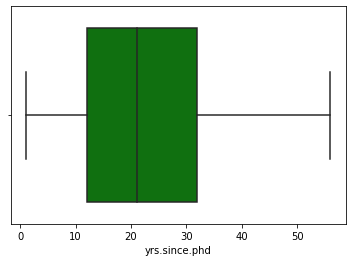

In [20]:
sns.boxplot(df_sal['yrs.since.phd'],color='green',orient='v')

In [21]:
#Encoding

from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [23]:
for i in df_sal.columns:
    if df_sal[i].dtypes=="object":
        df_sal[i]=oe.fit_transform(df_sal[i].values.reshape(-1,1))
df_sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


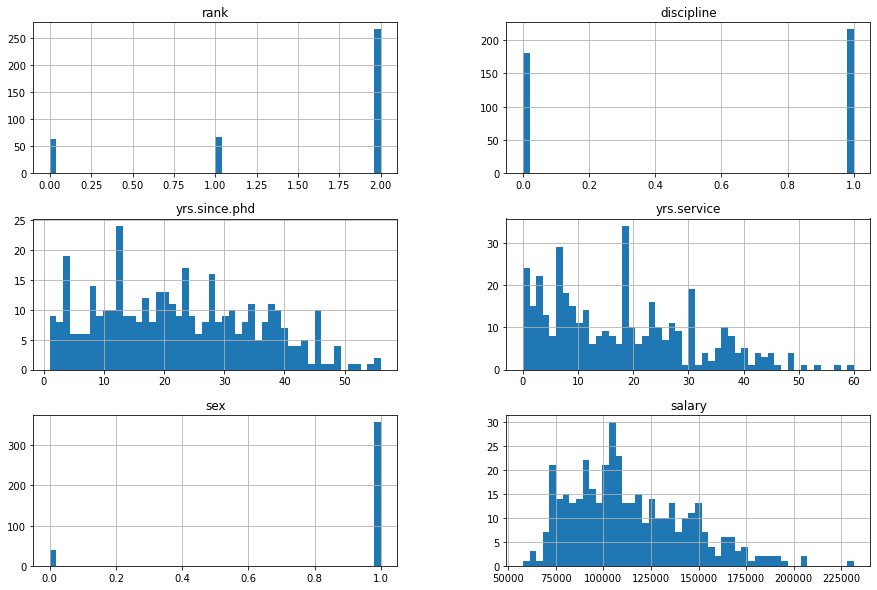

In [24]:
df_sal.hist(bins = 50, figsize = (15,10))
plt.show()

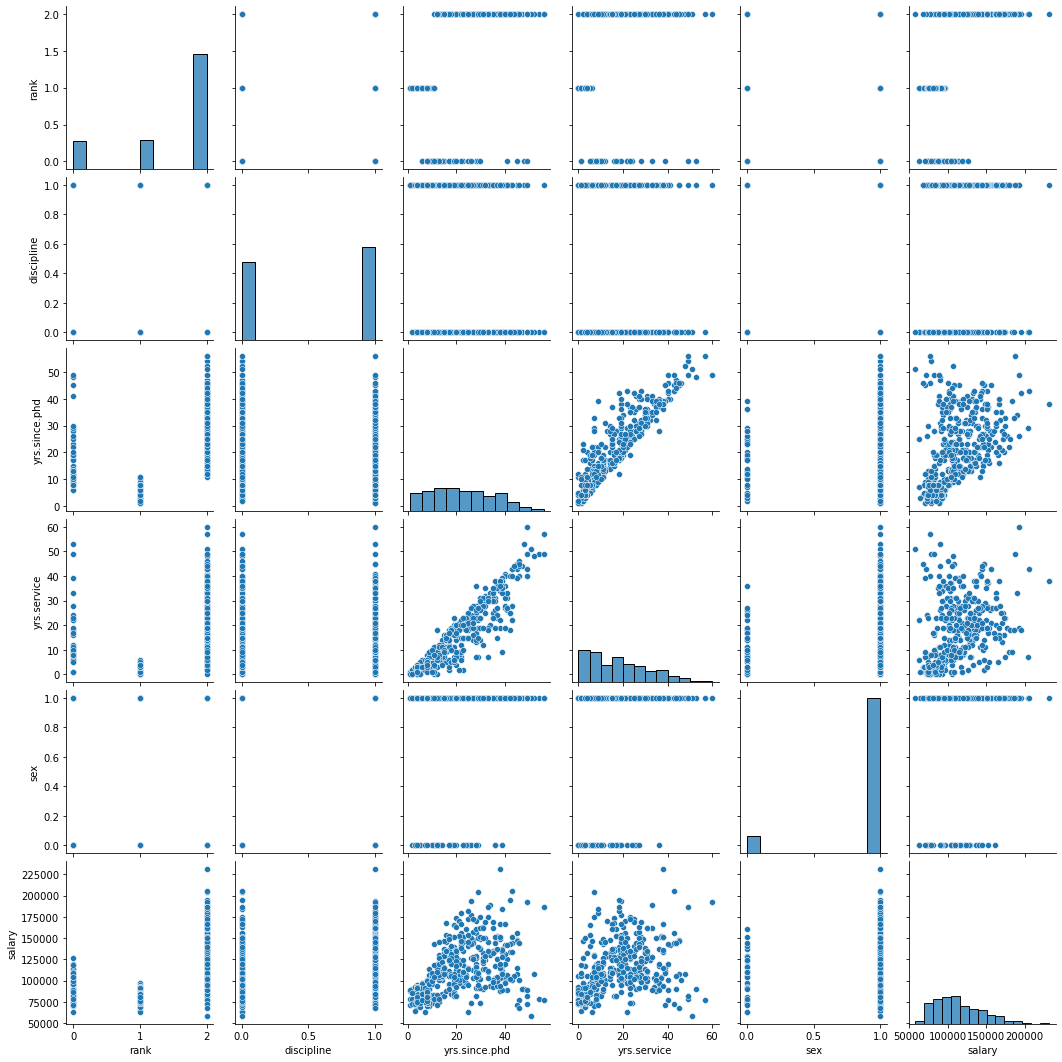

In [25]:
sns.pairplot(df_sal)

In [26]:
df_sal.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

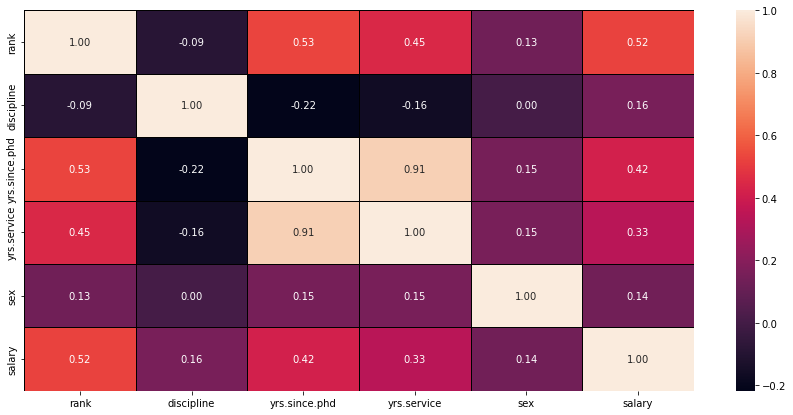

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(df_sal.corr(), annot=True, linewidths=0.5, linecolor='Black', fmt = '.2f')

In [28]:
#Removing Outliers

from scipy.stats import zscore

In [29]:
z=np.abs(zscore(df_sal))
df_new=df_sal[(z<3).all(axis=1)]
df_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [30]:
print(df_sal.shape)

print(df_new.shape)

(397, 6)
(354, 6)


In [31]:
data_loss=((397-354)/397)*100
data_loss

10.831234256926953

In [32]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
x = df_new.drop(['salary'],axis=1)
y = df_new['salary']

In [34]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [36]:
lr=LinearRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state",i)
        print("Training r2_score is:",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:",r2_score(y_test,pred_test)*100)

At random state 323 The model performs very well
At random state 323
Training r2_score is: 39.10662177771409
Testing r2_score is: 39.12906303490297
At random state 579 The model performs very well
At random state 579
Training r2_score is: 38.626514310584994
Testing r2_score is: 38.64140385436856
At random state 852 The model performs very well
At random state 852
Training r2_score is: 38.99841039165426
Testing r2_score is: 38.99148890468066


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=323)
lr.fit(x_train, y_train)
pred=lr.predict(x_test)


from sklearn.metrics import mean_squared_error,mean_absolute_error

print("r2 Score=",r2_score(y_test, pred))
print("Mean Sqaured error =",mean_squared_error(y_test,pred))
print("Root mean squared error=",np.sqrt(mean_squared_error(y_test,pred)))

r2 Score= 0.39129063034902967
Mean Sqaured error = 487425991.11430573
Root mean squared error= 22077.726130974308


In [38]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
lasso_reg =linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [39]:
lasso_reg.score(x_test,y_test)

0.3942295341979023

In [40]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=10, bootstrap=True, random_state=2000)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)

print("r2 Score=",r2_score(pred,y_test))
print("Mean squared error: ", mean_squared_error(pred,y_test))

r2 Score= 0.0661563878102438
Mean squared error:  588069778.337031


In [41]:
# Knn model

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)

#check the accuracy score
print("r2 Score=",r2_score(y_test,predknn))
print("Mean squared error: ", mean_squared_error(y_test,predknn))

r2 Score= 0.35186596892577915
Mean squared error:  518995415.9115493


In [42]:
#Decision Tree 
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr = dtr.predict(x_test)
print("r2 Score=",r2_score(y_test,preddtr))
print("Mean squared error: ", mean_squared_error(y_test,preddtr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, preddtr)))

r2 Score= -0.20193513323668788
Mean squared error:  962453434.7301447
Root Mean Squared Error:  31023.433638624607


In [43]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = r2_score(y_test,pred_lr)
for i in range(4,10):
    lsscore =cross_val_score(lr,x,y,cv=i)
    lsc = lsscore.mean()
    print("At cv:",i)
    print("cross validation score: ",lsc*100)
    print("r2_score: ",lss*100)
    print("\n")

At cv: 4
cross validation score:  33.9762019093161
r2_score:  39.12906303490297


At cv: 5
cross validation score:  32.70755281052462
r2_score:  39.12906303490297


At cv: 6
cross validation score:  33.83230507300499
r2_score:  39.12906303490297


At cv: 7
cross validation score:  34.50291758117835
r2_score:  39.12906303490297


At cv: 8
cross validation score:  35.54832630267275
r2_score:  39.12906303490297


At cv: 9
cross validation score:  33.75339273335252
r2_score:  39.12906303490297




In [44]:
import pickle
filename='Salary'
pickle.dump(lr,open(filename,'wb'))

In [45]:
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"Original":a,"Predicted":predicted}, index= range(len(a)))
df_com

,Original,Predicted
0,94384,125797.670104
1,109305,124257.019310
2,77202,125358.905296
3,155750,127410.215505
4,114330,116232.507138
...,...,...
66,105128,88950.673124
67,135027,125209.102064
68,156938,128774.379983
69,95079,93860.227658
